<a href="https://colab.research.google.com/github/DristantaNirola/Nifty50_Index_Movement_Prediction/blob/main/Capston_project_nifty_Stock_direction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is Nifty?
 
#### National Stock Exchange Fifty or Nifty is the market indicator of NSE. It ideally is a collection of 50 stocks but presently has 51 listed in it. It is also referred to as Nifty 50 and CNX Nifty by some as it is owned and managed by India Index Services and Products Ltd. (IISL).
 
## How is Nifty index calculated?
 
#### Nifty is also calculated through the free-float market capitalization weighted method. Just like Sensex, Nifty also follows a mathematical formula based to know the market capitalization. It multiples the Equity capital with a price to derive the market capitalization. To determine the Free-float market capitalization, equity capital is multiplied by a price which is further multiplied with IWF which is the factor for determining the number of shares available for trading freely in the market. The Index is determined on a daily basis by taking into consideration the current market value divided by base market capital and then multiplied by the Base Index Value of 1000.

##  Objective : 
* ### The problem is to predict the direction of nifty index movements in the next N days (throughout our experiments N can take values 1, 5, and 30). Initially, we will take N=1, that means we want to predict the NIFTY 50 index movement in the next day

* ### This is a classification task where there are two possible outcomes (either the index went up in the next day or it went down

### Importing required libraries

In [1]:
# Libraries for data manipulation
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


# Datetime library for date and time functions
from datetime import datetime

### Reading in the data 

In [2]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
nifty_data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 5/Week 1/Day 1/Nifty50_data.csv')

# shape of the dataset 
nifty_data.shape

(5301, 5)

### Basic pre processing on our raw data

In [4]:
# Top 5 values
nifty_data.head()

,Date,Open,High,Low,Close
0,2000-01-03,1482.15,1592.90,1482.15,1592.2
1,2000-01-04,1594.40,1641.95,1594.40,1638.7
2,2000-01-05,1634.55,1635.50,1555.05,1595.8
3,2000-01-06,1595.80,1639.00,1595.80,1617.6
4,2000-01-07,1616.60,1628.25,1597.20,1613.3


In [5]:
# Bottom 5 values
nifty_data.tail()

,Date,Open,High,Low,Close
5296,2021-05-04,14687.250000,14723.400391,14461.500000,14496.500000
5297,2021-05-05,14604.150391,14637.900391,14506.599609,14617.849609
5298,2021-05-06,14668.349609,14743.900391,14611.500000,14724.799805
5299,2021-05-07,14816.849609,14863.049805,14765.500000,14823.150391
5300,2021-05-10,14928.250000,14966.900391,14892.500000,14942.349609


In [10]:
# setting dates as the index to the the dataframe
nifty_df = nifty_data.set_index('Date')

In [11]:
nifty_df.head()

,Open,High,Low,Close
Date,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2
2000-01-04,1594.40,1641.95,1594.40,1638.7
2000-01-05,1634.55,1635.50,1555.05,1595.8
2000-01-06,1595.80,1639.00,1595.80,1617.6
2000-01-07,1616.60,1628.25,1597.20,1613.3


In [8]:
# Finding the total null values
nifty_df.isna().sum()

Open     35
High     35
Low      35
Close    35
dtype: int64

In [15]:
nifty_df[nifty_df.isnull().any(axis=1)]

,Open,High,Low,Close
Date,,,,
2008-11-27,NaN,NaN,NaN,NaN
2009-04-30,NaN,NaN,NaN,NaN
2009-10-13,NaN,NaN,NaN,NaN
2009-12-23,NaN,NaN,NaN,NaN
2009-12-24,NaN,NaN,NaN,NaN
2009-12-29,NaN,NaN,NaN,NaN
2009-12-30,NaN,NaN,NaN,NaN
2009-12-31,NaN,NaN,NaN,NaN
2010-02-06,NaN,NaN,NaN,NaN


In [9]:
# Droping the null values 
nifty_df.dropna(inplace=True)

In [24]:
nifty_df.shape

(5301, 4)

* The data has 5336 rows and 5 columns.
* Their are 35 null values in the dataframe which includes the date when the trading didn't happened.
* The null values are droped from the dataset for further analysis.


## 1. Exploratory Data Analysis:

In [12]:
# finding the high level statistics for the continious features
nifty_df.describe()

,Open,High,Low,Close
count,5266.000000,5266.000000,5266.000000,5266.000000
mean,5551.787316,5588.846043,5506.832156,5548.545092
std,3582.719644,3594.485464,3561.245855,3578.111274
min,853.000000,877.000000,849.950000,854.200000
25%,2057.987500,2074.525000,2045.950000,2058.750000
50%,5213.675049,5252.199951,5163.449951,5211.025000
75%,8261.987305,8308.112793,8216.375244,8262.199707
max,15371.450195,15431.750000,15243.400391,15314.700195


### 1.1. Line plot

<Figure size 1080x504 with 0 Axes>

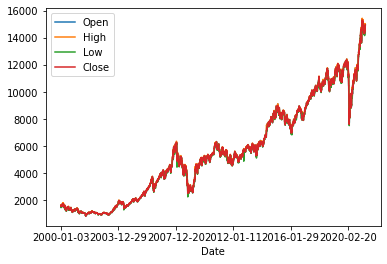

In [23]:
# Ploting a multiline line plot
plt.figure(figsize=(15, 7)) 
lines= nifty_df[:].plot.line()

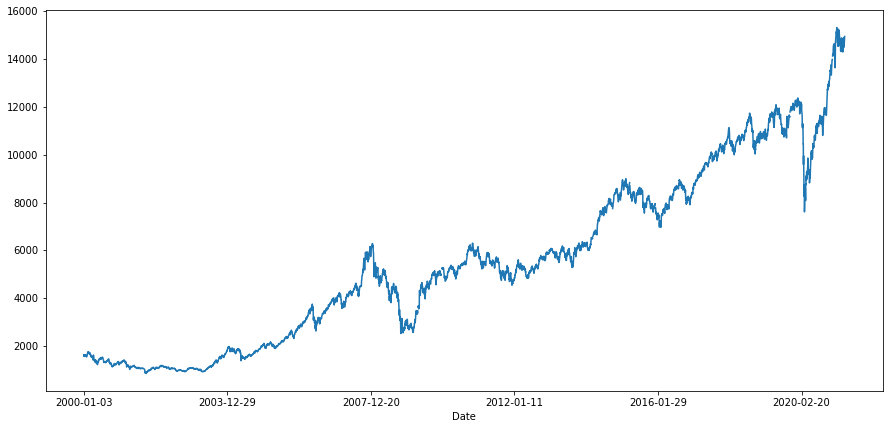

In [22]:
# Closing price trend
plt.figure(figsize=(15, 7))
line= nifty_df['Close'].plot.line()

In [25]:
# Finding the rise in 2008
nifty_df[nifty_df['Close']== max(nifty_df['Close'].loc['2007-01-01':'2009-01-01'])]

,Open,High,Low,Close
Date,,,,
2008-01-08,6282.450195,6357.100098,6221.600098,6287.850098


The 50-share Nifty opened at 6,282 levels, surpassing its previous intra-day high on January 8, 2008, after the outcome of the Assembly polls in Delhi, Rajasthan, Madhya Pradesh and Chattisgarh, that saw the Bharatiya Janata Party (BJP) emerge as the single largest party. The index finally ended at its record closing high of 6,287.

In [17]:
# Finding the fall in 2008
nifty_df[nifty_df['Close']== min(nifty_df['Close'].loc['2007-01-01':'2009-01-01'])]

,Open,High,Low,Close
Date,,,,
2008-10-27,2583.75,2585.300049,2252.75,2524.199951


The 50 share Nifty open at 2583 and closed at 2524 on 2008-10-27 which was the outcome of the Global financial crisis.

In [63]:
# Date of min closing price in 20 years
nifty_df[nifty_df['Close']== nifty_df['Close'].min()]

,Open,High,Low,Close
Date,,,,
2001-09-21,903.75,903.75,849.95,854.2


On 2001-09-21 the nifty50 was at it's low

In [62]:
# Date of maximum closing price in 20 years
nifty_df[nifty_df['Close']== nifty_df['Close'].max()]

,Open,High,Low,Close
Date,,,,
2021-02-15,15270.299805,15340.150391,15243.400391,15314.700195


on 2021-02-15 the nifty was at it's all time high. This was outcome of more Investments coming in India as an alternative to china due to the global pendamic.

In [64]:
#index jump
index_jump= np.array(nifty_df['Close'].iloc[1:]) - np.array(nifty_df['Close'].iloc[:-1])

In [65]:
#date of maximum price jump
nifty_df.iloc[np.argmax(index_jump),:]

Open     8356.549805
High     8356.549805
Low      8055.799805
Close    8083.799805
Name: 2020-04-03, dtype: float64

on 2020-04-03 there was higest rise in the index 

In [70]:
#index fall
index_fall= np.array(nifty_df['Close'].iloc[:-1]) - np.array(nifty_df['Close'].iloc[1:])

In [71]:
#date of maximum index fall
nifty_df.iloc[np.argmax(index_fall),:]

Open     8284.450195
High     8883.000000
Low      8178.200195
Close    8745.450195
Name: 2020-03-20, dtype: float64

On 2020-03-20 there was maximum fall in the nifty index which was the outcome of country wide lockdown.

#### 1.2 Decomposition of Time Series

There are a couple of models to consider during the Decomposition of Time Series data.
1. Additive Model: This model is used when the variations around the trend does not vary with the level of the time series. Here the components of a time series are simply added together using the formula:  
y(t) = Level(t) + Trend(t) + Seasonality(t) + Noise(t)
2. Multiplicative Model: Is used if the trend is proportional to the level of the time series. Here the components of a time series are simply multiplied together using the formula:  
y(t) = Level(t) * Trend(t) * Seasonality(t) *Noise(t)

In [76]:
df= nifty_data[['Date','Close']]
df.dropna(inplace=True)
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.sort_index(inplace= True)
s=sm.tsa.seasonal_decompose(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ValueError: ignored

In [77]:
import statsmodels.api as sm
decomposition= sm.tsa.seasonal_decompose(nifty_df['Close'], model= 'additive')
fig = decomposition.plot()


AttributeError: ignored

ref_notebook: https://colab.research.google.com/drive/1_cRHfTloSgapiHpF3JhUVvN8ztiBaDNS